# Visualizations

## Categorical distribution

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
encodingCases = ("global", "for rule with \n\"vendor $\\in$ {textilesA, textilesB}\"")
absoluteFrequencies = {
    "textilesA": (1857, 1857),
    "textilesB": (542, 542),
    "textilesC": (1293, 0)
}
totalCounts = (sum([x[0] for _, x in absoluteFrequencies.items()]),
               sum([x[1] for _, x in absoluteFrequencies.items()]))
relativeFrequencies = {key: (value[0] / totalCounts[0], value[1] / totalCounts[1])
                       for key, value in absoluteFrequencies.items()}

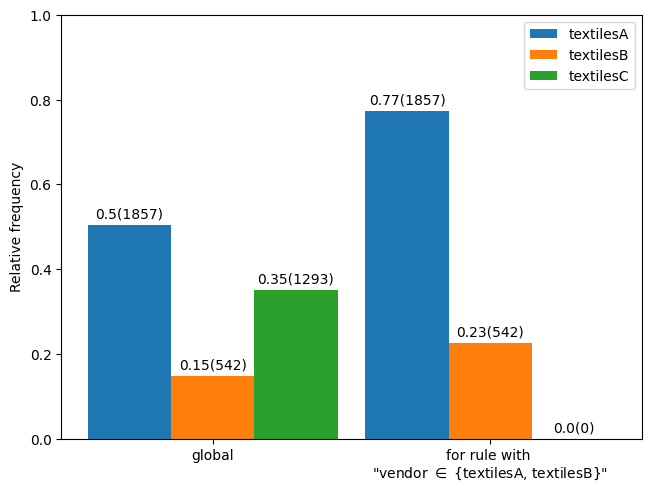

In [3]:
x = np.arange(len(encodingCases)) # the label locations
width = 0.3  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in relativeFrequencies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, [str(round(rela, 2)) + "(" + str(abso) + ")" for rela, abso in
                         zip(measurement, absoluteFrequencies[attribute])], padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Relative frequency")
ax.set_xticks(x + width, encodingCases)
ax.legend()
ax.set_ylim(0, 1.0)

plt.savefig("CategoricalValueEncodingExample.pdf")
plt.show()

In [4]:
relativeFrequencies

{'textilesA': (0.502979414951246, 0.7740725302209254),
 'textilesB': (0.14680390032502708, 0.2259274697790746),
 'textilesC': (0.35021668472372697, 0.0)}

In [5]:
import math
def computeCodeLength(p):
    if p > 0:
        return -math.log2(p)
    else:
        return float("nan")
codeLengths = {key: (computeCodeLength(value[0]), computeCodeLength(value[1]))
               for key, value in relativeFrequencies.items()}
codeLengths

{'textilesA': (0.9914287377103532, 0.36945934235801375),
 'textilesB': (2.7680377962919027, 2.146068400939563),
 'textilesC': (1.5136802778355198, nan)}

In [6]:
codeLengths["textilesA"][1] + codeLengths["textilesB"][0] + codeLengths["textilesC"][0]

4.651177416485437

## Numerical histogram

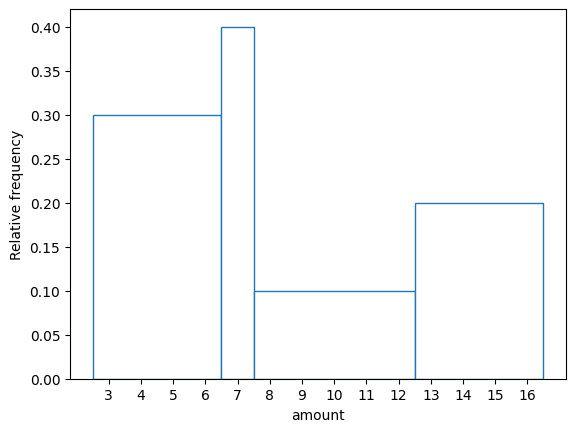

In [7]:
binCenters = [4.5, 7, 10, 14.5]
binWidths = [4, 1, 5, 4]
binHeights = [0.3, 0.4, 0.1, 0.2]

plt.bar(binCenters, width=binWidths, height=binHeights, color="white", edgecolor="C0", linewidth=1)
plt.xticks(np.arange(3, 17, 1))
plt.ylabel("Relative frequency")
plt.xlabel("amount")
plt.savefig("HistogramExample.pdf")
plt.show()

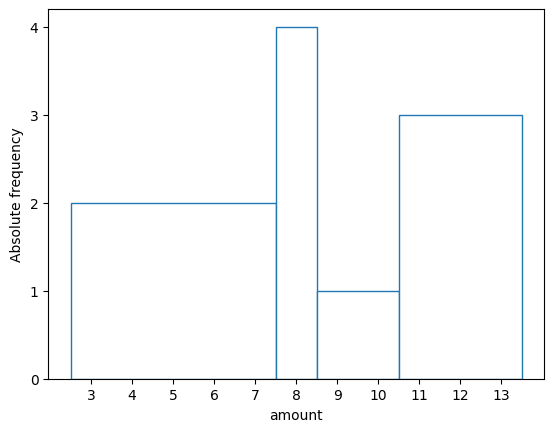

In [8]:
binCenters = [5, 8, 9.5, 12]
binWidths = [5, 1, 2, 3]
binHeights = [2, 4, 1, 3]

plt.bar(binCenters, width=binWidths, height=binHeights, color="white", edgecolor="C0", linewidth=1)
plt.xticks(np.arange(3, 14, 1))
plt.yticks(np.arange(0, 5, 1))
plt.ylabel("Absolute frequency")
plt.xlabel("amount")
plt.savefig("HistogramExampleScoreEstimate.pdf")
plt.show()